# About

SHiP track pattern recognition is in this notebook.

# Data

In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt
import cPickle as pickle

In [3]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index

In [9]:
all_hits[all_hits.event == 50]

,Unnamed: 0,Unnamed: 0.1,Bits,TrackID,Px,Py,Pz,Time,Length,ELoss,...,PdgCode,dist2Wire,event,k,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Index
4038,4038,4038,33554432,3,0.246668,-0.241326,9.053971,384.034607,0.968670,5.194689e-06,...,-13,0.056143,50,0,1,0,0,1,363,4038
4039,4039,4039,33554432,3,0.246555,-0.240906,9.053960,384.092346,0.482321,1.811043e-06,...,-13,0.423608,50,1,1,0,1,0,362,4039
4040,4040,4040,33554432,3,0.246509,-0.240840,9.053933,384.130035,0.470706,1.398031e-06,...,-13,0.426859,50,2,1,0,1,1,363,4040
4041,4041,4041,33554432,3,0.246699,-0.240280,9.053917,384.332245,0.925328,2.304394e-06,...,-13,0.153728,50,3,1,1,0,0,364,4041
4042,4042,4042,33554432,3,0.246655,-0.239989,9.053908,384.420166,0.878649,9.721189e-06,...,-13,0.211356,50,4,1,1,1,0,364,4042
4043,4043,4043,33554432,3,0.246556,-0.239256,9.053905,384.705475,0.757603,2.366587e-06,...,-13,0.306908,50,5,1,2,0,1,361,4043
4044,4044,4044,33554432,3,0.246694,-0.239135,9.053884,384.789124,0.964868,3.284471e-06,...,-13,0.070837,50,6,1,2,1,1,361,4044
4045,4045,4045,33554432,3,0.246440,-0.238258,9.053897,385.000397,0.912935,4.647918e-06,...,-13,0.171320,50,7,1,3,0,0,363,4045
4046,4046,4046,33554432,3,0.246444,-0.237954,9.053879,385.127899,0.644786,3.209998e-06,...,-13,0.365648,50,8,1,3,1,1,363,4046
4047,4047,4047,33554432,3,0.247167,-0.212034,9.054481,390.714111,0.789442,2.969211e-06,...,-13,0.286129,50,9,2,0,0,1,366,4047


In [8]:
mother = all_mctracks[all_mctracks.event == 50].MotherId.values
all_mctracks[all_mctracks.event == 50]#[mother == -2]

,Unnamed: 0,index,_,UniqueID,Bits,PdgCode,MotherId,Px,Py,Pz,StartX,StartY,StartZ,StartT,W,NPoints,event,k
5798,5798,50,0,0,33554432,411,-1,-0.544904,-0.610032,94.778610,0.000000,0.000000,-8927.000000,0.000000,0.000023,0,50,0
5799,5799,50,0,0,33554432,9900015,0,-0.267106,-0.325937,53.012691,-0.018266,-0.020449,-8923.823242,0.106002,0.000023,0,50,1
5800,5800,50,0,0,33554432,-211,1,-0.513613,-0.061163,43.959366,-43.354710,-52.901821,-322.825958,287.064484,0.000023,0,50,2
5801,5801,50,0,0,33554432,-13,1,0.246507,-0.264774,9.053326,-43.354710,-52.901821,-322.825958,287.064484,0.000023,0,50,3
5802,5802,50,0,0,33554432,11,3,-0.000427,0.011214,0.128099,160.575485,-117.862640,8597.127930,584.783142,0.000023,0,50,4
5803,5803,50,0,0,33554432,11,3,0.015022,0.008260,0.184834,75.177444,-139.157654,4152.770996,436.466675,0.000023,0,50,5
5804,5804,50,0,0,33554432,2212,2,0.316570,-0.042822,0.854298,-90.712051,-63.159081,3728.710938,422.219849,0.000023,0,50,6
5805,5805,50,0,0,33554432,-211,2,-0.182175,0.084637,0.283013,-90.712051,-63.159081,3728.710938,422.219849,0.000023,0,50,7
5806,5806,50,0,0,33554432,-211,2,-0.275759,0.055737,0.127638,-90.712051,-63.159081,3728.710938,422.219849,0.000023,0,50,8
5807,5807,50,0,0,33554432,111,2,0.000201,-0.153010,1.267823,-90.712051,-63.159081,3728.710938,422.219849,0.000023,0,50,9


# Get reconstructible events

In [4]:
from utils import get_reconstractible_events
#reconstructible_events = get_reconstractible_events(range(0, 2500), all_hits, all_mctracks, all_velo_points)

# file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'wb')
# pickle.dump(reconstructible_events, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'rb')
reconstructible_events_pkl = pickle.load(file_pickle)
file_pickle.close()

reconstructible_events = reconstructible_events_pkl

In [5]:
# reconstructible_events_valid = get_reconstractible_events(range(2500, 5000), all_hits, all_mctracks, all_velo_points)

# file_pickle = open('./Data/reco_tracks_for_pattern_recognition_valid.pkl', 'wb')
# pickle.dump(reconstructible_events_valid, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_tracks_for_pattern_recognition_valid.pkl', 'rb')
reconstructible_events_valid_pkl = pickle.load(file_pickle)
file_pickle.close()

reconstructible_events_valid = reconstructible_events_valid_pkl

In [6]:
numpy.array(reconstructible_events.keys())

array([ 513,    2,  515,  516, 1541,  518,    7,   10, 2059, 1036, 1550,
         15, 2392, 1042, 1557,   23,   27, 2077, 2132, 1057,  549,   39,
       1066, 2482,  558, 2095,   48,  928,   50, 2099,   53, 1204, 1546,
         62, 1600, 2113, 1090, 1206, 1606, 1607, 1548,   74, 1293, 2232,
         84,   85,   86, 1111, 2138, 1116, 1629,  606, 1893,  608,   97,
       1979,  612, 1637,  614, 1129,  106, 1895, 2305, 2157,  622, 1213,
       1136,  625, 1138, 2164, 1142, 1655,  122, 1385,  126,  686,  129,
        642,  131, 1668, 1157,  134,  135,  648, 1280,  651, 1677,  654,
        143, 1683, 1691, 2204, 1693,  670,  159, 2208,  161, 2246, 1190,
       1704,  174,  824, 2224, 1224,  179,  692, 1717,  694,  184, 1722,
       1724,  189, 2239,  707, 2244, 1967, 1222,  712, 1200, 1900,  719,
       1232, 2446,  211, 2260, 1238,  215, 2264, 1242, 1243, 1756,  221,
       1758, 2271,  736, 1761, 1762, 1251, 2277, 1256, 1769, 2282,  747,
       2429, 2002, 1262,  893, 1265, 2290, 1235, 22

In [7]:
def merge_dicts(dicts):
    '''
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    '''
    result = {}
    for dictionary in dicts:
        result.update(dictionary)
    return result

all_reconstructible_events = merge_dicts([reconstructible_events, reconstructible_events_valid])

# Stations 1&2

In [8]:
%%time
from Y_views import loop_yz
from UV_views import loop_xz

reco_events12 = {}

for event_id in all_reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.85, 0, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 0)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events12[event_id] = reco

CPU times: user 2min 35s, sys: 1.53 s, total: 2min 36s
Wall time: 2min 40s


In [9]:
file_pickle = open('./Data/reco_events12.pkl', 'wb')
pickle.dump(reco_events12, file_pickle)
file_pickle.close()

file_pickle = open('./Data/reco_events12.pkl', 'rb')
reco_events12_pkl = pickle.load(file_pickle)
file_pickle.close()

reco_events12 = reco_events12_pkl

# Stations 3&4

In [10]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events34 = {}

for event_id in all_reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.85, 1, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 1)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events34[event_id] = reco

In [11]:
file_pickle = open('./Data/reco_events34.pkl', 'wb')
pickle.dump(reco_events34, file_pickle)
file_pickle.close()

file_pickle = open('./Data/reco_events34.pkl', 'rb')
reco_events34_pkl = pickle.load(file_pickle)
file_pickle.close()

reco_events34 = reco_events34_pkl

# Combination tracks

In [12]:
from MatchTracks import get_matched_tracks, get_true_match

match_tracks, charge_dict, pinv_dict, dist_y, dist_x = get_matched_tracks(reco_events12, reco_events34, zmagnet=3070.)

true_charge_dict, true_pdg_dict, true_pinv_dict = get_true_match(reco_events12, reco_events34, match_tracks, all_hits)

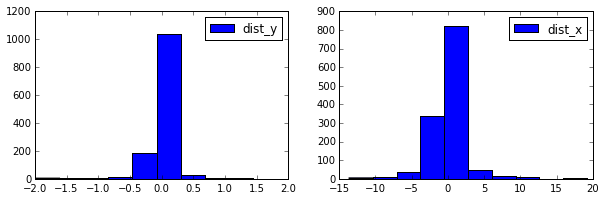

In [13]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
dist_y = numpy.array(dist_y)
plt.hist(dist_y, label='dist_y', bins=10)
plt.legend(loc='best')


plt.subplot(1,2,2)
dist_x = numpy.array(dist_x)
plt.hist(dist_x, label='dist_x', bins=10)
plt.legend(loc='best')

plt.show()

# Efficiency

### Stations 1&2

In [14]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(all_reconstructible_events.keys(), 
                                                                     all_hits, 
                                                                     reco_events12)

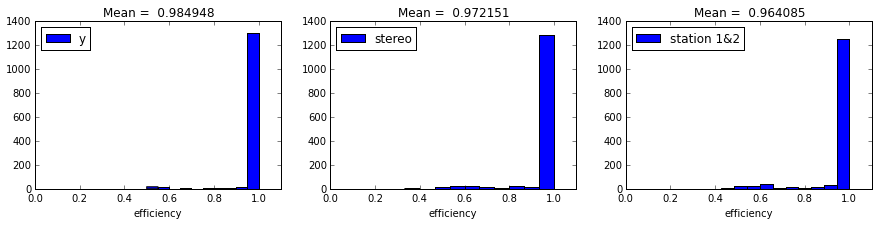

In [15]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Stations 3&4

In [16]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(all_reconstructible_events.keys(), 
                                                                     all_hits, 
                                                                     reco_events34)

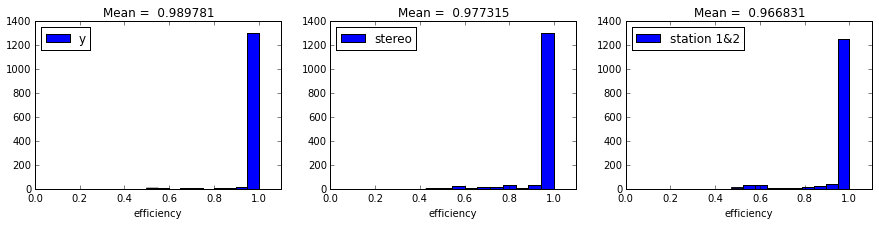

In [17]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Efficiency per event

Total efficiency per event is  90.0  %


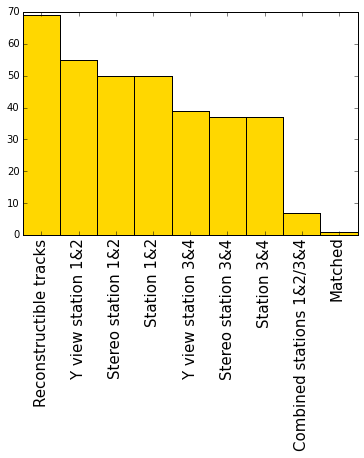

In [18]:
from efficiency import efficiency_per_event

n_events, missed_events = efficiency_per_event(all_reconstructible_events, 
                                               reco_events12, 
                                               reco_events34, 
                                               match_tracks, 
                                               true_pdg_dict,
                                               all_hits)

n_events = numpy.array(n_events)

labels = ['Reconstructible tracks', 
          'Y view station 1&2', 
          'Stereo station 1&2', 
          'Station 1&2',
          'Y view station 3&4', 
          'Stereo station 3&4',
          'Station 3&4',
          'Combined stations 1&2/3&4',
          'Matched']

print 'Total efficiency per event is ', 1. * n_events[-1] / n_events[0] * 100., ' %'

x = range(len(labels))
#plt.figure(figsize=(15,5))
plt.bar(x, n_events - n_events.min() + 1., width=1., color='gold', align='center')
plt.xticks(x, labels, rotation=90, size=15)
plt.xlim(-0.5, 8.5)
plt.show()

In [19]:
n_events

array([ 680.,  666.,  661.,  661.,  650.,  648.,  648.,  618.,  612.])

In [20]:
numpy.array(missed_events)

array([3110, 4156, 3253, 1090, 3165, 4811, 4297,  381, 3085, 3190, 3498,
       4580, 2654, 2040,  270, 3781, 4595, 1528, 3670,    7,  143, 4490,
        426,  670, 3749, 1722, 1756, 3194, 1848, 3916, 1142, 4342, 3097,
       2762, 4108,   85,  102, 3750, 4265, 4439, 3298, 4747, 2277, 4817,
       2295, 2605, 2771, 4307, 2624, 4334, 2455,  408, 1541,  558, 3650,
       2720,  715, 1769, 3607, 2029, 3241, 1023, 2263, 3406, 4175, 2594,
       2836,  970])

# Momentum

y = b + kx
k, b =  0.000196223374853 -0.00175582404879
Cov matrix is 
[[  4.10022095e-08   2.48024723e-08]
 [  2.48024723e-08   1.27143108e-05]]


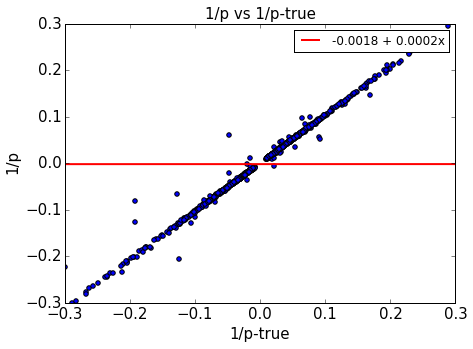

In [21]:
from MatchTracks import get_pinv_true_pinv
        
pinv, true_pinv = get_pinv_true_pinv(pinv_dict, true_pinv_dict, true_charge_dict)
        

[k, b], cov = numpy.polyfit(true_pinv, pinv, 1, cov=True)
print 'y = b + kx'
print 'k, b = ', k, b
print 'Cov matrix is '
print cov

plt.figure(figsize=(7, 5))
plt.title('1/p vs 1/p-true', size=15)
plt.scatter(true_pinv, pinv)
x = numpy.array([-0.3, 0.3])
plt.plot(x, k * x + b, color='r', linewidth=2, label='%.4f + ' % b + '%.4fx' % k)
plt.legend(loc='best')
plt.ylabel('1/p', size=15)
plt.xlabel('1/p-true', size=15)
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

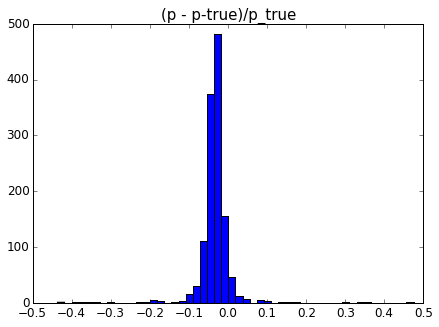

In [22]:
metric = true_pinv/pinv - 1

plt.figure(figsize=(7, 5))
plt.hist(metric[numpy.abs(metric) <= 0.5], bins=50)

plt.title('(p - p-true)/p_true', size=15)
plt.xticks(numpy.arange(-0.5, 0.51, 0.1), size=12)
plt.yticks(size=12)
plt.xlim(-0.5, 0.5)
plt.show()